# Explore here

In [923]:
# Your code here

In [924]:
import os
import pandas as pd
import csv

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")

os.makedirs("/workspaces/decision-tree-algorithm/data/raw", exist_ok = True)
file_path = os.path.join("/workspaces/decision-tree-algorithm/data/raw", "diabetes.csv")

df.to_csv(file_path, index=False)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- **Pregnancies**: Number of pregnancies of the patient (numeric)
- **Glucose**: Plasma glucose concentration 2 hours after an oral glucose tolerance test (numeric)
- **BloodPressure**: Diastolic blood pressure (measured in mm Hg) (numeric)
- **SkinThickness**: Triceps skin fold thickness (measured in mm) (numeric)
- **Insulin**: 2-hour serum insulin (measured in mu U/ml) (numeric)
- **BMI**: Body mass index (numeric)
- **DiabetesPedigreeFunction**: Diabetes Pedigree Function (numeric)
- **Age**: Age of patient (numeric)
- **Outcome**: Class variable (0 or 1), being 0 negative in diabetes and 1 positive (numeric)

In [925]:
df.shape

(768, 9)

In [926]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- No null values, no type object columns.

- **CORRELATION MAP**

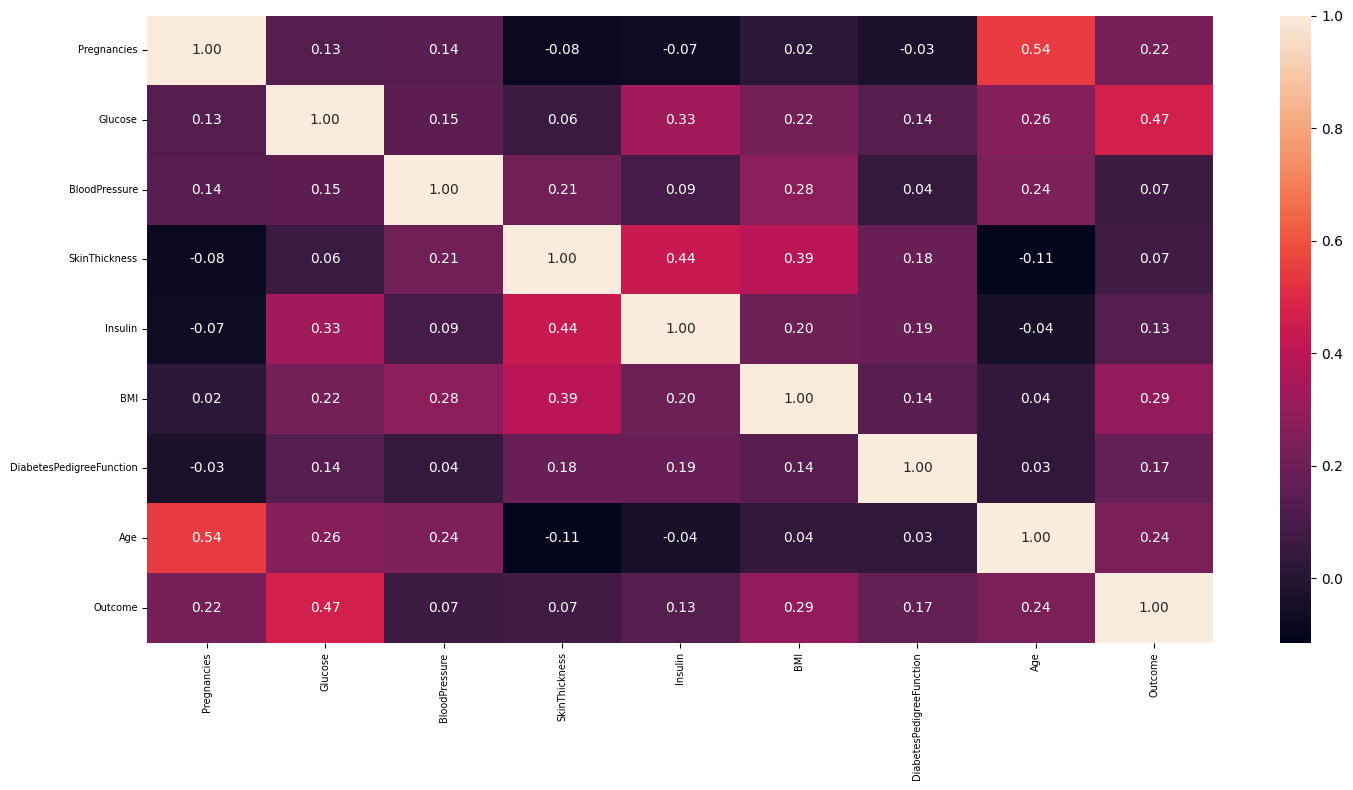

In [927]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(figsize = (15, 8))

sns.heatmap(df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]].corr(), annot = True, fmt = ".2f")

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.tight_layout()
plt.show()

- **Glucose** is a strong predictor
- **Pregnancies**, **BMI**, **Age** have moderate correlation

In [928]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


 - **Insulin** and **BMI** have very high max values, we'll cap them to prevent affecting the precission of the prediction.

- Working BMI's outliers

In [929]:
bmi_stats = df["BMI"].describe()
bmi_stats

bmi_iqr = bmi_stats["75%"] - bmi_stats["25%"]

bmi_upper_limit = bmi_stats["75%"] + 1.5 * bmi_iqr
bmi_lower_limit = bmi_stats["25%"] - 1.5 * bmi_iqr

print(f'BMI upper limit: {round(bmi_upper_limit, 2)}')
print(f'BMI lower limit: {round(bmi_lower_limit, 2)} \n')

df['BMI'] = df['BMI'].apply(
    lambda x: min(x, bmi_upper_limit) if x > bmi_upper_limit else x
)

BMI upper limit: 50.55
BMI lower limit: 13.35 



- Working Insulin's outliers

In [930]:
insulin_stats = df["Insulin"].describe()
insulin_stats

insulin_iqr = insulin_stats["75%"] - insulin_stats["25%"]

insulin_upper_limit = insulin_stats["75%"] + 1.5 * insulin_iqr
insulin_lower_limit = insulin_stats["25%"] - 1.5 * insulin_iqr

print(f'Insulin upper limit: {round(insulin_upper_limit, 2)}')
print(f'Insulin lower limit: {round(insulin_lower_limit, 2)} \n')

df['Insulin'] = df['Insulin'].apply(
    lambda x: min(x, insulin_upper_limit) if x > insulin_upper_limit else x
)

Insulin upper limit: 318.12
Insulin lower limit: -190.88 



- Checking the dataframe with the outliers dealt with

In [931]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,73.652669,31.933854,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,93.576029,7.707488,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,318.125000,50.550000,2.420000,81.000000,1.000000


- **SPLITTING INTO TRAIN AND TEST**

In [932]:
from sklearn.model_selection import train_test_split

split_df = df.copy()

X = split_df.drop("Outcome", axis = 1)
y = split_df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

display(X_train)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0.000,0.0,0.304,21
618,9,112,82,24,0.000,28.2,1.282,50
346,1,139,46,19,83.000,28.7,0.654,22
294,0,161,50,0,0.000,21.9,0.254,65
231,6,134,80,37,318.125,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140.000,28.6,0.411,26
106,1,96,122,0,0.000,22.4,0.207,27
270,10,101,86,37,0.000,45.6,1.136,38
435,0,141,0,0,0.000,42.4,0.205,29


In [933]:
from sklearn.feature_selection import SelectKBest

selection_model = SelectKBest(k = 7)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_selected = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_selected = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

y_train = pd.Series(y_train, index=X_train.index)
y_test = pd.Series(y_test, index=X_test.index)

display(X_test_selected)

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,98.0,58.0,190.000,34.0,0.430,43.0
1,2.0,112.0,75.0,0.000,35.7,0.148,21.0
2,2.0,108.0,64.0,0.000,30.8,0.158,21.0
3,8.0,107.0,80.0,0.000,24.6,0.856,34.0
4,7.0,136.0,90.0,0.000,29.9,0.210,50.0
...,...,...,...,...,...,...,...
149,9.0,165.0,88.0,0.000,30.4,0.302,49.0
150,1.0,77.0,56.0,56.000,33.3,1.251,24.0
151,8.0,95.0,72.0,0.000,36.8,0.485,57.0
152,2.0,146.0,70.0,318.125,28.0,0.337,29.0


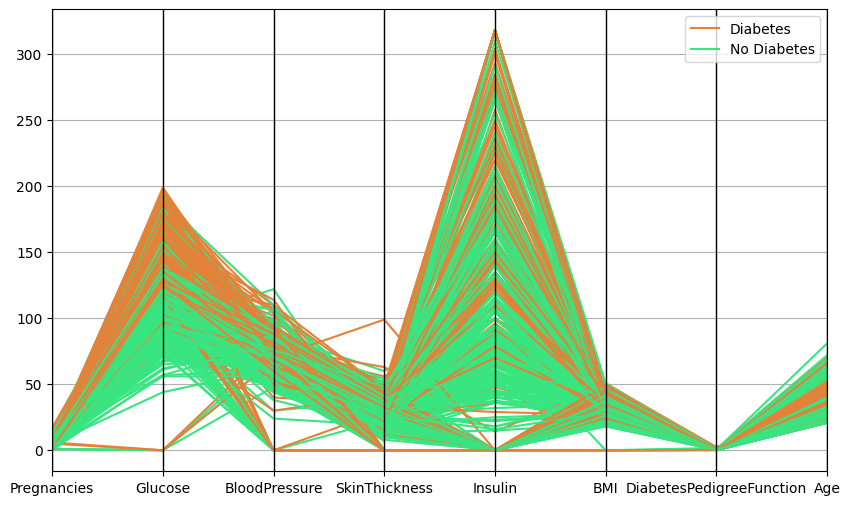

In [934]:
plt.figure(figsize=(10, 6))

pd.plotting.parallel_coordinates(df, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

legend_labels = {0: "No Diabetes", 1: "Diabetes"}
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [legend_labels[int(label)] for label in labels]

plt.legend(handles, new_labels)

plt.show()

- Patients with diabetes seem to have more glucose and insulin

- **DECISION TREE**

In [935]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train_selected, y_train)

DecisionTreeClassifier()

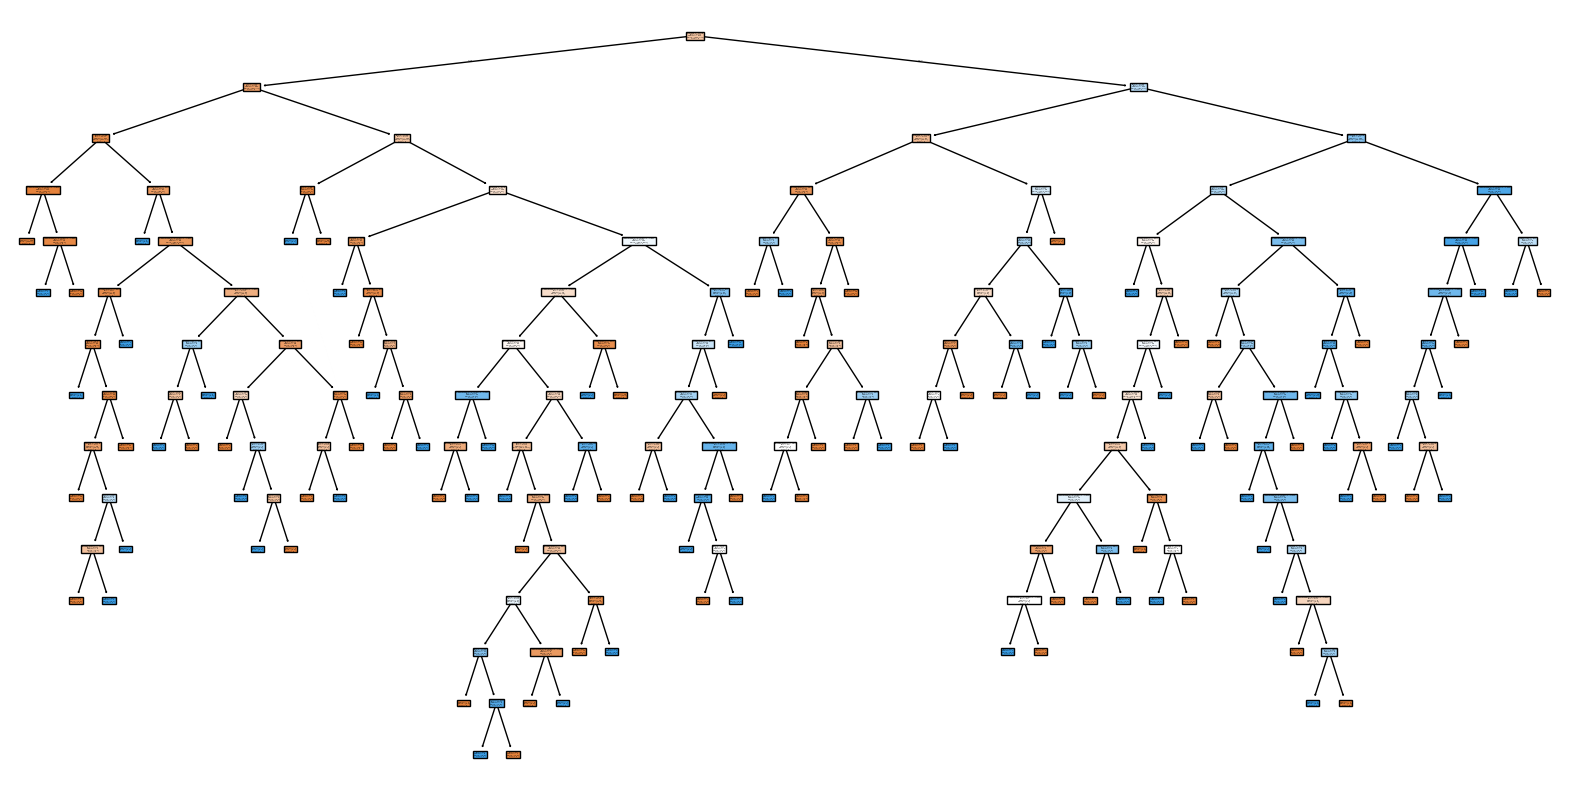

In [936]:
from sklearn import tree

fig = plt.figure(figsize=(20,10))

tree.plot_tree(model, feature_names = list(X_train_selected.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [937]:
y_pred = model.predict(X_test_selected)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [938]:
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
print("Classification Report:\n", classification_report(y_test, y_pred))

MSE: 0.23376623376623376
Accuracy score: 0.7662337662337663
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.81        99
           1       0.66      0.73      0.69        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.77      0.77      0.77       154



- Saving the model and train/test data

In [939]:
from pickle import dump

file_path = os.path.join("/workspaces/decision-tree-algorithm/models", "decision_tree_classifier_default_42.sav")
dump(model, open(file_path, "wb"))

- **OPTIMIZING THE MODEL**

In [940]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "criterion": ["gini", "entropy"],  
    "max_depth": [3, 5, 10, None],  
    "min_samples_split": [2, 5, 10],  
    "min_samples_leaf": [1, 2, 4]  
}

grid_search = GridSearchCV(model, param_grid, cv=10, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [941]:
y_pred_optimized = best_model.predict(X_test)
y_pred_optimized

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [942]:
print(f"MSE: {mean_squared_error(y_test, y_pred_optimized)}")
print(f"Accuracy score: {accuracy_score(y_test, y_pred_optimized)}")
print("Classification Report:\n", classification_report(y_test, y_pred_optimized))

MSE: 0.22727272727272727
Accuracy score: 0.7727272727272727
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.82        99
           1       0.68      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



- Model without optimization: 

    - MSE: 0.24025974025974026
    - Accuracy score: 0.7597402597402597

- Optimized model:

    - MSE: 0.22727272727272727
    - Accuracy score: 0.7727272727272727

The accuracy improved by ~0.01

In [943]:
X_train_selected["Outcome"] = y_train.values
X_test_selected["Outcome"] = y_test.values
X_train_selected.to_csv("/workspaces/decision-tree-algorithm/data/processed/processed_train.csv", index = False)
X_test_selected.to_csv("/workspaces/decision-tree-algorithm/data/processed/processed_test.csv", index = False)

file_path = os.path.join("/workspaces/decision-tree-algorithm/models", "decision_tree_classifier_default_42_OPTIMIZED.sav")
dump(model, open(file_path, "wb"))